<a href="https://colab.research.google.com/github/anujpatel96/WeatherForecasting/blob/main/TorontoWeatherForecasting__LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("weather data toronto.csv")
data

,date,max_dew_point_v,max_dew_point_c,max_dew_point_d,max_dew_point_y,max_humidex_v,max_humidex_c,max_humidex_d,max_humidex_y,max_min_temperature_v,max_min_temperature_c,max_min_temperature_d,max_min_temperature_y,max_relative_humidity_v,max_relative_humidity_c,max_relative_humidity_d,max_relative_humidity_y,max_solar_radiation_v,max_solar_radiation_c,max_solar_radiation_d,max_solar_radiation_y,max_temperature_v,max_temperature_c,max_temperature_d,max_temperature_y,max_wind_gust_v,max_wind_gust_c,max_wind_gust_d,max_wind_gust_y,max_wind_speed_v,max_wind_speed_c,max_wind_speed_d,max_wind_speed_y,min_dew_point_v,min_dew_point_c,min_dew_point_d,min_dew_point_y,min_max_temperature_v,min_max_temperature_c,min_max_temperature_d,min_max_temperature_y,min_relative_humidity_v,min_relative_humidity_c,min_relative_humidity_d,min_relative_humidity_y,min_solar_radiation_v,min_solar_radiation_c,min_solar_radiation_d,min_solar_radiation_y,min_temperature_v,min_temperature_c,min_temperature_d,min_temperature_y,min_wind_speed_v,min_wind_speed_c,min_wind_speed_d,min_wind_speed_y,min_windchill_v,min_windchill_c,min_windchill_d,min_windchill_y,precipitation_v,precipitation_c,precipitation_d,precipitation_y,rain_v,rain_c,rain_d,rain_y,snow_v,snow_c,snow_d,snow_y,snow_on_ground_v,snow_on_ground_c,snow_on_ground_d,snow_on_ground_y
0,4/7/2021,14.0,68,1953-04-07 2020-04-07,1991,30.0,1.0,1991-04-07 1991-04-07,1991,15.6,83,1938-04-07 2020-04-07,1991,100,68,1953-04-07 2020-04-07,1954 1956 1958 1964 1965 1966 1978 1983 2010,NaN,NaN,NaN,NaN,27.6,83,1938-04-07 2020-04-07,1991,87,57,1955-04-07 2020-04-07,1956,57,68,1953-04-07 2020-04-07,2017,-20.0,68,1953-04-07 2020-04-07,1972,-5.0,83,1938-04-07 2020-04-07,1972,18,68,1953-04-07 2020-04-07,2012,NaN,NaN,NaN,NaN,-17.2,83,1938-04-07 2020-04-07,1972,0,68,1953-04-07 2020-04-07,1959 1960 1962 1964 1965 1968 1980 1981 1983 1...,-25.0,41.0,1955-04-07 2018-04-07,1972,15.2,83,1938-04-07 2020-04-07,1956,14.4,83,1938-04-07 2020-04-07,2010,14.0,83,1938-04-07 2020-04-07,1967,12,61,1955-04-07 2017-04-07,1994
1,4/6/2021,13.3,69,1953-04-06 2021-04-06,1954 1991,NaN,NaN,NaN,NaN,10.3,84,1938-04-06 2021-04-06,1991,100,69,1953-04-06 2021-04-06,1954 1955 1964 1986,NaN,NaN,NaN,NaN,22.5,84,1938-04-06 2021-04-06,1997,111,54,1955-04-06 2020-04-06,1979,81,69,1953-04-06 2021-04-06,1979,-15.6,69,1953-04-06 2021-04-06,1972,-4.0,84,1938-04-06 2021-04-06,1982,20,69,1953-04-06 2021-04-06,2021,NaN,NaN,NaN,NaN,-11.7,84,1938-04-06 2021-04-06,1972,0,69,1953-04-06 2021-04-06,1953 1954 1956 1962 1964 1965 1966 1968 1978 1...,-20.0,37.0,1953-04-06 2020-04-06,1972,28.2,84,1938-04-06 2021-04-06,2017,27.8,84,1938-04-06 2021-04-06,2017,10.4,84,1938-04-06 2021-04-06,1994,13,62,1955-04-06 2018-04-06,1975
2,4/5/2021,10.9,69,1953-04-05 2021-04-05,1991,NaN,NaN,NaN,NaN,9.9,84,1938-04-05 2021-04-05,2010,100,69,1953-04-05 2021-04-05,1957 1984 1985,NaN,NaN,NaN,NaN,23.1,84,1938-04-05 2021-04-05,2010,96,54,1956-04-05 2020-04-05,1977,58,69,1953-04-05 2021-04-05,1975,-17.8,69,1953-04-05 2021-04-05,2016,-2.1,84,1938-04-05 2021-04-05,2007,24,69,1953-04-05 2021-04-05,2001,NaN,NaN,NaN,NaN,-9.4,84,1938-04-05 2021-04-05,1975 1982,0,69,1953-04-05 2021-04-05,1955 1959 1961 1962 1965 1970 1971 1984 1985 1...,-20.0,43.0,1954-04-05 2019-04-05,1975,22.1,84,1938-04-05 2021-04-05,1941,22.1,84,1938-04-05 2021-04-05,1941,2.0,84,1938-04-05 2021-04-05,2003,13,62,1955-04-05 2018-04-05,1975
3,4/4/2021,13.9,69,1953-04-04 2021-04-04,1974,NaN,NaN,NaN,NaN,12.0,84,1938-04-04 2021-04-04,1981,100,69,1953-04-04 2021-04-04,1956 1960 1968 1974 1979 1983 1989 2007,NaN,NaN,NaN,NaN,23.1,84,1938-04-04 2021-04-04,1981,103,59,1956-04-04 2020-04-04,1963,77,69,1953-04-04 2021-04-04,1963,-19.4,69,1953-04-04 2021-04-04,1954,-4.4,84,1938-04-04 2021-04-04,1975,21,69,1953-04-04 2021-04-04,1958,NaN,NaN,NaN,NaN,-11.7,84,1938-04-04 2021-04-04,1954,0,69,1953-04-04 2021-04-04,1959 1960 1961 1962 1972 1973 1977 1978 1980 1...,-19.0,38.0,1954-04-04 2021-04-04,1975,18.0,84,1938-04-04 2021-04-04,1968,18.0,84,1938-04-

In [ ]:
for cols in data.columns:
  print(cols)

date
max_dew_point_v
max_dew_point_c
max_dew_point_d
max_dew_point_y
max_humidex_v
max_humidex_c
max_humidex_d
max_humidex_y
max_min_temperature_v
max_min_temperature_c
max_min_temperature_d
max_min_temperature_y
max_relative_humidity_v
max_relative_humidity_c
max_relative_humidity_d
max_relative_humidity_y
max_solar_radiation_v
max_solar_radiation_c
max_solar_radiation_d
max_solar_radiation_y
max_temperature_v
max_temperature_c
max_temperature_d
max_temperature_y
max_wind_gust_v
max_wind_gust_c
max_wind_gust_d
max_wind_gust_y
max_wind_speed_v
max_wind_speed_c
max_wind_speed_d
max_wind_speed_y
min_dew_point_v
min_dew_point_c
min_dew_point_d
min_dew_point_y
min_max_temperature_v
min_max_temperature_c
min_max_temperature_d
min_max_temperature_y
min_relative_humidity_v
min_relative_humidity_c
min_relative_humidity_d
min_relative_humidity_y
min_solar_radiation_v
min_solar_radiation_c
min_solar_radiation_d
min_solar_radiation_y
min_temperature_v
min_temperature_c
min_temperature_d
min_tempe

In [ ]:
data = data[["date", "max_min_temperature_v" ,"max_min_temperature_c", "max_min_temperature_d", "max_min_temperature_y", "max_temperature_v", "max_temperature_c", "max_temperature_d", 
             "max_temperature_y", "min_max_temperature_v", "min_max_temperature_c", "min_max_temperature_d", "min_max_temperature_y", "min_temperature_v", "min_temperature_c", 
             "min_temperature_d", "min_temperature_y"]]
data

,date,max_min_temperature_v,max_min_temperature_c,max_min_temperature_d,max_min_temperature_y,max_temperature_v,max_temperature_c,max_temperature_d,max_temperature_y,min_max_temperature_v,min_max_temperature_c,min_max_temperature_d,min_max_temperature_y,min_temperature_v,min_temperature_c,min_temperature_d,min_temperature_y
0,4/7/2021,15.6,83,1938-04-07 2020-04-07,1991,27.6,83,1938-04-07 2020-04-07,1991,-5.0,83,1938-04-07 2020-04-07,1972,-17.2,83,1938-04-07 2020-04-07,1972
1,4/6/2021,10.3,84,1938-04-06 2021-04-06,1991,22.5,84,1938-04-06 2021-04-06,1997,-4.0,84,1938-04-06 2021-04-06,1982,-11.7,84,1938-04-06 2021-04-06,1972
2,4/5/2021,9.9,84,1938-04-05 2021-04-05,2010,23.1,84,1938-04-05 2021-04-05,2010,-2.1,84,1938-04-05 2021-04-05,2007,-9.4,84,1938-04-05 2021-04-05,1975 1982
3,4/4/2021,12.0,84,1938-04-04 2021-04-04,1981,23.1,84,1938-04-04 2021-04-04,1981,-4.4,84,1938-04-04 2021-04-04,1975,-11.7,84,1938-04-04 2021-04-04,1954
4,4/3/2021,7.2,84,1938-04-03 2021-04-03,2010,22.2,84,1938-04-03 2021-04-03,1981,-3.3,84,1938-04-03 2021-04-03,1954,-12.2,84,1938-04-03 2021-04-03,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7/17/2018,24.1,81,1938-07-17 2018-07-17,2013,36.8,81,1938-07-17 2018-07-17,2012,21.1,81,1938-07-17 2018-07-17,2015,6.1,81,1938-07-17 2018-07-17,1939
996,7/16/2018,23.8,81,1938-07-16 2018-07-16,2005,34.7,81,1938-07-16 2018-07-16,1988,21.1,81,1938-07-16 2018-07-16,1967,7.2,81,1938-07-16 2018-07-16,1967
997,7/15/2018,22.3,81,1938-07-15 2018-07-15,2005,35.7,81,1938-07-15 2018-07-15,1983,17.2,81,1938-07-15 2018-07-15,1945,6.7,81,1938-07-15 2018-07-15,1967
998,7/14/2018,23.6,81,1938-07-14 2018-07-14,2005,36.8,81,1938-07-14 2018-07-14,1995,16.1,81,1938-07-14 2018-07-14,1967,7.8,81,1938-07-14 2018-07-14,1950


In [ ]:
data_temp = data[["date", "max_min_temperature_v", "max_temperature_v", "min_max_temperature_v", "min_temperature_v"]]
data_temp

,date,max_min_temperature_v,max_temperature_v,min_max_temperature_v,min_temperature_v
0,4/7/2021,15.6,27.6,-5.0,-17.2
1,4/6/2021,10.3,22.5,-4.0,-11.7
2,4/5/2021,9.9,23.1,-2.1,-9.4
3,4/4/2021,12.0,23.1,-4.4,-11.7
4,4/3/2021,7.2,22.2,-3.3,-12.2
...,...,...,...,...,...
995,7/17/2018,24.1,36.8,21.1,6.1
996,7/16/2018,23.8,34.7,21.1,7.2
997,7/15/2018,22.3,35.7,17.2,6.7
998,7/14/2018,23.6,36.8,16.1,7.8


In [ ]:
data_temp.describe()

,max_min_temperature_v,max_temperature_v,min_max_temperature_v,min_temperature_v
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.925000,24.392900,1.278700,-9.112600
std,7.664341,9.035851,12.477893,12.114986
min,-0.200000,7.200000,-21.000000,-31.300000
25%,5.600000,16.100000,-10.600000,-21.225000
50%,12.800000,25.300000,1.950000,-7.200000
75%,20.600000,33.300000,13.325000,1.700000
max,26.300000,38.300000,21.700000,8.900000


In [ ]:
import statistics
data_temp["Temp"] = "Nan"
for i in range(len(data_temp)):
  data_temp["Temp"][i] = statistics.mean([data_temp["max_min_temperature_v"][i], data_temp["max_temperature_v"][i], data_temp["min_max_temperature_v"][i], data_temp["min_temperature_v"][i]])
data_temp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,date,max_min_temperature_v,max_temperature_v,min_max_temperature_v,min_temperature_v,Temp
0,4/7/2021,15.6,27.6,-5.0,-17.2,5.25
1,4/6/2021,10.3,22.5,-4.0,-11.7,4.275
2,4/5/2021,9.9,23.1,-2.1,-9.4,5.375
3,4/4/2021,12.0,23.1,-4.4,-11.7,4.75
4,4/3/2021,7.2,22.2,-3.3,-12.2,3.475
...,...,...,...,...,...,...
995,7/17/2018,24.1,36.8,21.1,6.1,22.025
996,7/16/2018,23.8,34.7,21.1,7.2,21.7
997,7/15/2018,22.3,35.7,17.2,6.7,20.475
998,7/14/2018,23.6,36.8,16.1,7.8,21.075


In [ ]:
data_temp = data_temp.drop(columns= ["max_min_temperature_v", "max_temperature_v", "min_max_temperature_v" , "min_temperature_v"])
data_temp

,date,Temp
0,4/7/2021,5.25
1,4/6/2021,4.275
2,4/5/2021,5.375
3,4/4/2021,4.75
4,4/3/2021,3.475
...,...,...
995,7/17/2018,22.025
996,7/16/2018,21.7
997,7/15/2018,20.475
998,7/14/2018,21.075


In [ ]:
data_temp["date"]= pd.to_datetime(data["date"])
data_temp

,date,Temp
0,2021-04-07,5.25
1,2021-04-06,4.275
2,2021-04-05,5.375
3,2021-04-04,4.75
4,2021-04-03,3.475
...,...,...
995,2018-07-17,22.025
996,2018-07-16,21.7
997,2018-07-15,20.475
998,2018-07-14,21.075


In [ ]:
data_temp = data_temp.set_index('date')
data_temp

,Temp
date,
2021-04-07,5.25
2021-04-06,4.275
2021-04-05,5.375
2021-04-04,4.75
2021-04-03,3.475
...,...
2018-07-17,22.025
2018-07-16,21.7
2018-07-15,20.475


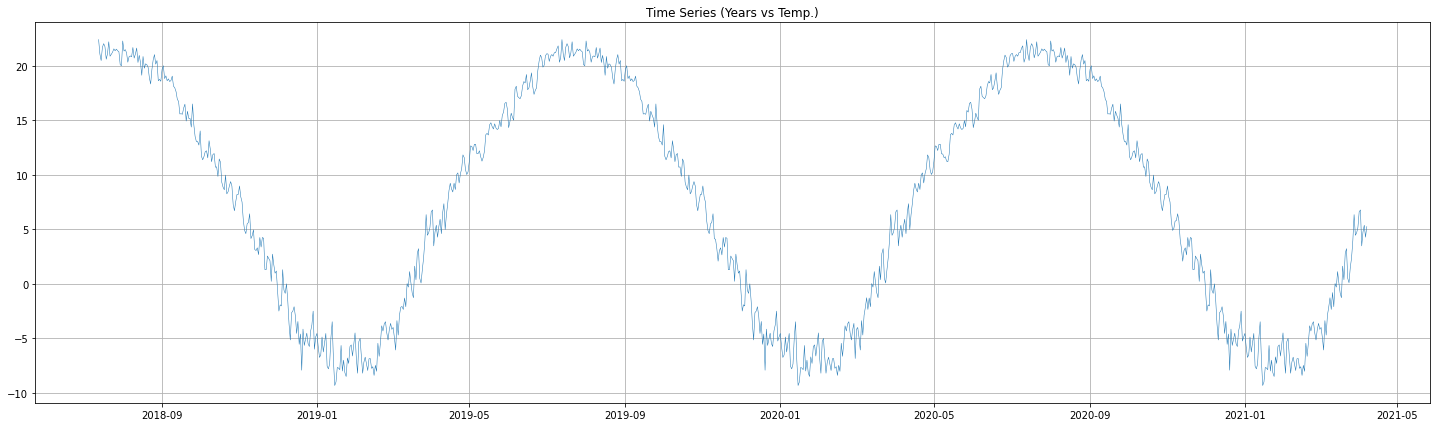

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(data_temp, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data_temp)
print(data_scaled.shape)


(1000, 1)


In [ ]:
steps= 30
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [ ]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [ ]:
x_train = inp[:800,:,:]
x_test = inp[800:,:,:]    
y_train = out[:800]    
y_test= out[800:]

In [ ]:
print(inp.shape, x_train.shape,x_test.shape)

(1, 30, 1) (1, 30, 1) (0, 30, 1)


In [ ]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train,y_train,epochs=100, verbose=1, callbacks = [early_stop] )
model.

Epoch 1/100
25/25 [==============================] - 13s 304ms/step - loss: 0.2798
Epoch 2/100
25/25 [==============================] - 7s 296ms/step - loss: 0.0200
Epoch 3/100
25/25 [==============================] - 7s 300ms/step - loss: 0.0085
Epoch 4/100
25/25 [==============================] - 7s 295ms/step - loss: 0.0099
Epoch 5/100
25/25 [==============================] - 7s 300ms/step - loss: 0.0080
Epoch 6/100
25/25 [==============================] - 8s 304ms/step - loss: 0.0064
Epoch 7/100
25/25 [==============================] - 8s 303ms/step - loss: 0.0055
Epoch 8/100
25/25 [==============================] - 8s 300ms/step - loss: 0.0066
Epoch 9/100
25/25 [==============================] - 8s 306ms/step - loss: 0.0058
Epoch 10/100
25/25 [==============================] - 8s 306ms/step - loss: 0.0048
Epoch 11/100
25/25 [==============================] - 8s 302ms/step - loss: 0.0053
Epoch 12/100
25/25 [==============================] - 7s 299ms/step - loss: 0.0052
Epoch 13/100

In [ ]:
predict = model.predict(x_test)
predict = scalar.inverse_transform(predict)
Ytesting = scalar.inverse_transform(y_test)

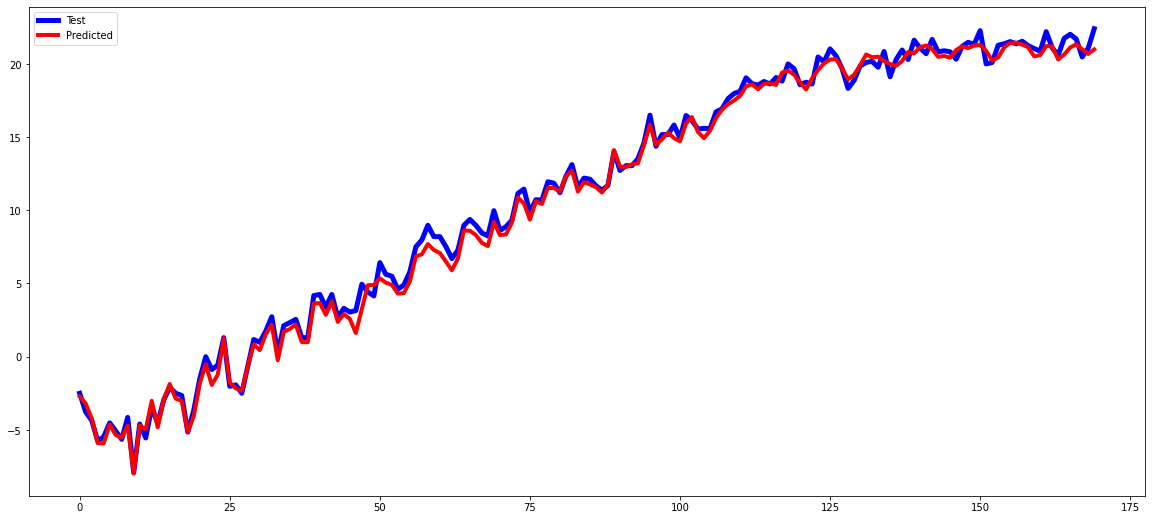

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

0.2920144151265663